# Red Wine Quality Prediction Project

Project Description
The dataset is related to red and white variants of the Portuguese &quot;Vinho Verde&quot; wine. Due to privacy and
logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there
is no data about grape types, wine brand, wine selling price, etc.).
This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there
are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are
relevant. So it could be interesting to test feature selection methods.
Attribute Information

    Input variables (based on physicochemical tests):
    1 - fixed acidity
    2 - volatile acidity
    3 - citric acid
    4 - residual sugar
    5 - chlorides
    6 - free sulfur dioxide
    7 - total sulfur dioxide
    8 - density
    9 - pH
    10 - sulphates
    11 - alcohol
    Output variable (based on sensory data):
    12 - quality (score between 0 and 10)
    
    
What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable
(wine quality) at e.g. 7 or higher getting classified as &#39;good/1&#39; and the remainder as &#39;not good/0&#39;.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at
the ROC curve and the AUC value.
You need to build a classification model. 
Inspiration
Use machine learning to determine which physiochemical properties make a wine &#39;good&#39;!
Dataset Link-
https://github.com/dsrscientist/DSData/blob/master/winequality-red.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [3]:
df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

# VARIABLES IN DATASET

    Alcohol: the amount of alcohol in wine
    Volatile acidity: are high acetic acid in wine which leads to an unpleasant vinegar taste
    Sulphates: a wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant
    Citric Acid: acts as a preservative to increase acidity (small quantities add freshness and flavor to wines)
    Total Sulfur Dioxide: is the amount of free + bound forms of SO2
    Density: sweeter wines have a higher density
    Chlorides: the amount of salt in the wine
    Fixed acidity: are non-volatile acids that do not evaporate readily
    pH: the level of acidity
    Free Sulfur Dioxide: it prevents microbial growth and the oxidation of wine
        Residual sugar: is the amount of sugar remaining after fermentation stops. The key is to have a perfect balance between — sweetness and sourness (wines > 45g/ltrs are sweet)
    For the purpose of this project, I converted the output to a binary output where each wine is either “good quality” (a score of 7 or higher) or not (a score below 7)

# STATISTICAL SUMMARY

In [4]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

This gives the statistical summary of the numerical columns. the summary of the dataset looks perfect since there is no -ve/invalid value present. from the above description we can observe the following

    1 The counts of all the columns are same which means there are no missing values in the dataset
    2 Minimum value of citric acid is zero. Need check if it valid data or some kind of data error.
    3 The median (50%) value is less than the mean in fixed acidity,volatile acidity,chlorides,total sulphur dioxide columns which means the data is skewed to right in these column
    4 By summarizing the data we can observe there is huge differences b/w 75% and max in residual sugar,free sulphur dioxide,total sulphur dioxide,sulphates hence there are outliers present in the data
    5 We can also notice the STD,min value 25% percentile value from this describe metod


# mean feature based on quality

In [5]:
mean= pd.pivot_table(data=df, index='quality',aggfunc={'fixed acidity':np.mean, 'volatile acidity':np.mean, 'citric acid':np.mean, 
                                                     'residual sugar':np.mean,'chlorides':np.mean,
                                                     'free sulfur dioxide':np.mean,'density':np.mean,'pH':np.mean,'sulphates':np.mean,'alcohol':np.mean})
mean


alcohol  chlorides  citric acid   density  fixed acidity  \
quality                                                               
3         9.955000   0.122500     0.171000  0.997464       8.360000   
4        10.265094   0.090679     0.174151  0.996542       7.779245   
5         9.899706   0.092736     0.243686  0.997104       8.167254   
6        10.629519   0.084956     0.273824  0.996615       8.347179   
7        11.465913   0.076588     0.375176  0.996104       8.872362   
8        12.094444   0.068444     0.391111  0.995212       8.566667   

         free sulfur dioxide        pH  residual sugar  sulphates  \
quality                                                             
3                  11.000000  3.398000        2.635000   0.570000   
4                  12.264151  3.381509        2.694340   0.596415   
5                  16.983847  3.304949        2.528855   0.620969   
6                  15.711599  3.318072        2.477194   0.675329   
7                  14.045226  3.290754        2.720603   0.741256   
8                  13.277778  3.267222        2.577778   0.767778   

         volatile acidity  
quality                    
3                0.884500  
4                0.693962  
5                0.577041  
6                0.497484  
7                0.403920  
8                0.423333

from above we can notice

    good quality wine (7&8)=has higher amount of alcohol,citric acid,sulphates
    good quality wine     = should have lower level of chlorides,ph and volatile acidity
    good quality wine     = should have moderate free sulphur oxide
     
     Density and residual sugar has no effect

# Create Classification version of target variable

    We will create two class for purpose of classification based on quality grade of red wine

    class 1- Good quality red wine - if a quality grade of 7 or higher
    class 0- Low quality red wine - if a quality grade less than 7


In [6]:
df['class']=[1 if x>=7 else 0 for x in df['quality']]

In [7]:
df1=df.drop(columns='quality')

In [8]:
df1

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  class  
0         9.4      0  
1         9.8      0  
2         9.8      0  
3         9.8      0  
4         9.4      0  
...       ...    ...  
1594     10.5      0  
1595     11.2      0  
1596     11.0      0  
1597     10.2      0  
1598     11.0      0  

[1599 rows x 12 columns]

In [9]:
#calculate the means based on class
mean=pd.pivot_table(data=df, index='class',aggfunc={'fixed acidity':np.mean, 'volatile acidity':np.mean, 'citric acid':np.mean, 
                                                     'residual sugar':np.mean,'chlorides':np.mean,
                                                     'free sulfur dioxide':np.mean,'density':np.mean,'pH':np.mean,'sulphates':np.mean,'alcohol':np.mean})
mean

alcohol  chlorides  citric acid   density  fixed acidity  \
class                                                               
0      10.251037   0.089281     0.254407  0.996859       8.236831   
1      11.518049   0.075912     0.376498  0.996030       8.847005   

       free sulfur dioxide        pH  residual sugar  sulphates  \
class                                                             
0                16.172214  3.314616        2.512120   0.644754   
1                13.981567  3.288802        2.708756   0.743456   

       volatile acidity  
class                    
0              0.547022  
1              0.405530

In [10]:
df['class'].value_counts()

0    1382
1     217
Name: class, dtype: int64

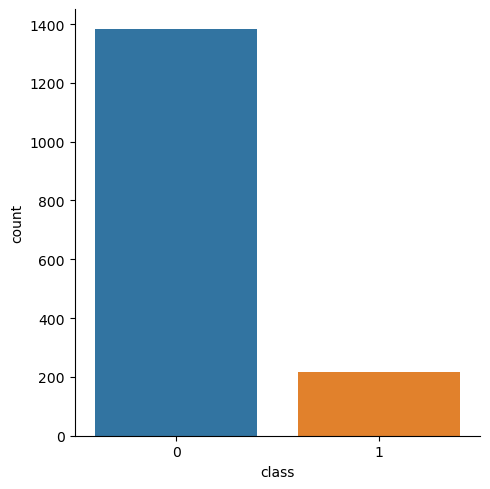

In [11]:

sns.catplot(x='class',kind='count',data=df)
plt.show()

# Checking null value or missing data


<AxesSubplot:>

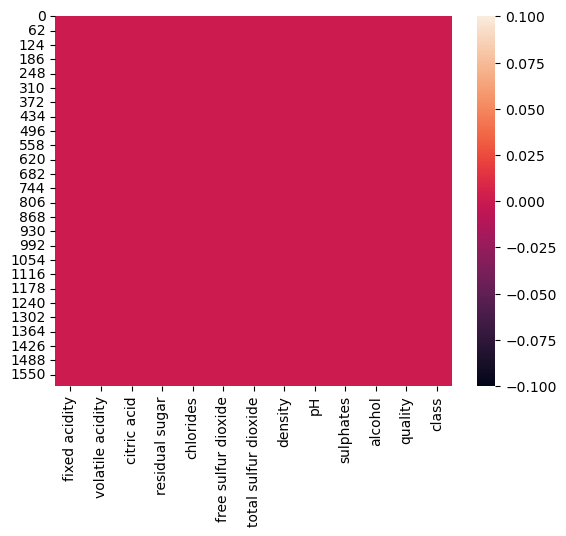

In [12]:
sns.heatmap(df.isnull())

from above map we can see there is no null values

In [13]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
class                   0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:xlabel='quality', ylabel='count'>

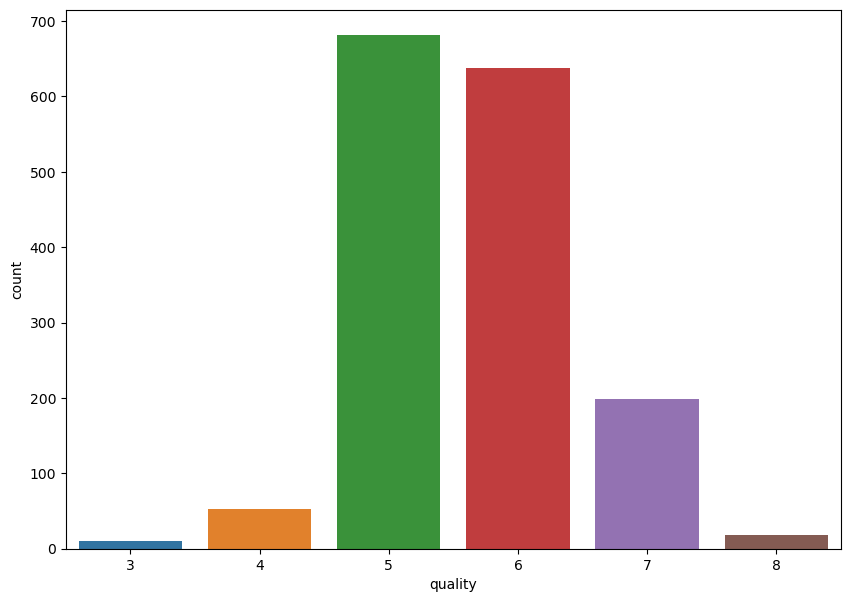

In [14]:
plt.figure(figsize =(10, 7))
sns.countplot(df['quality'])

In [15]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Comment -
    
    Majority of wine samples are of quality level 5 and 6.
    This dataset we have only 217 wine sample with higher quality grade.


# Distribution of features 

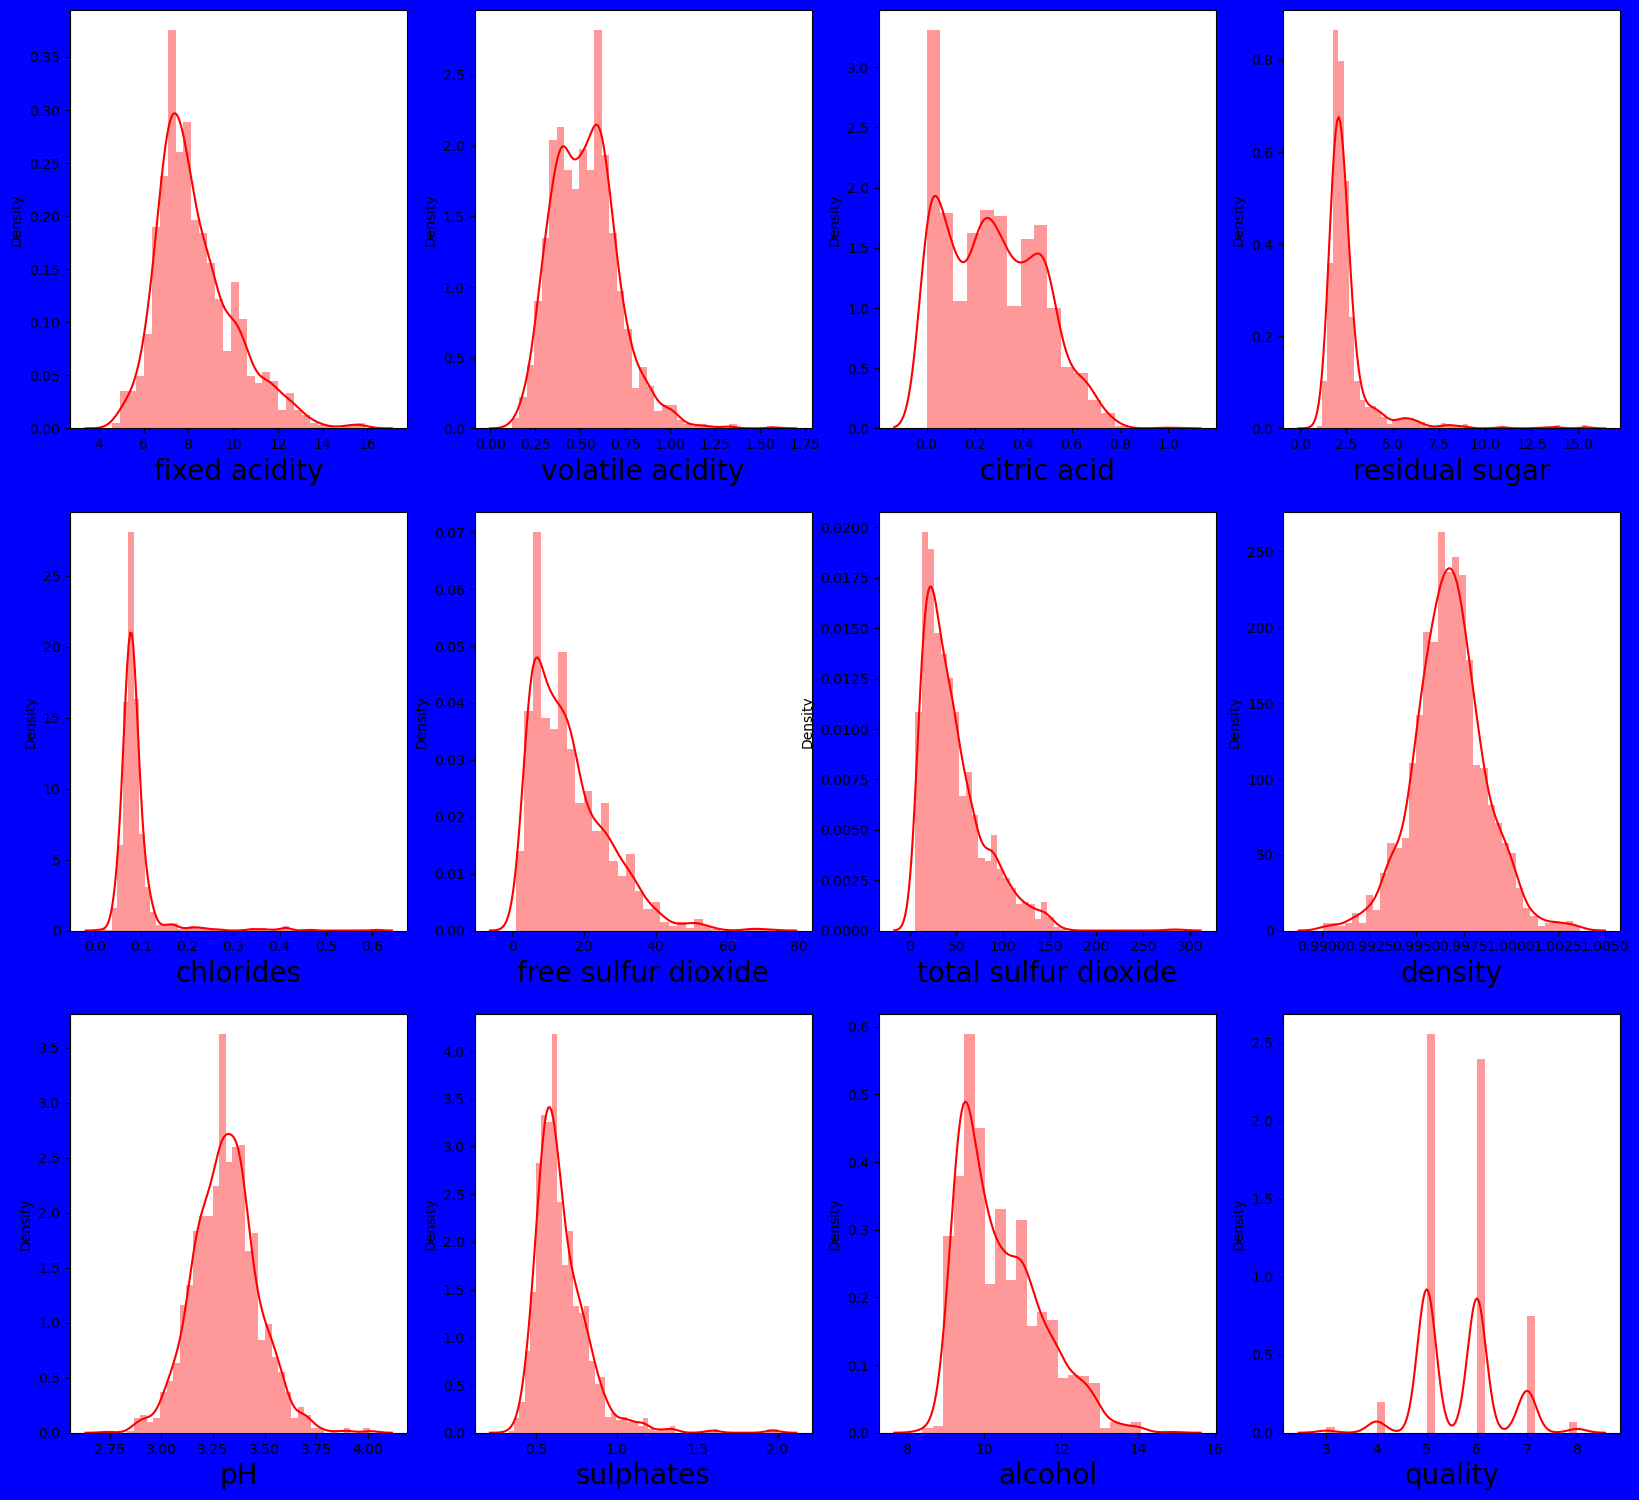

In [16]:
plt.figure(figsize=(20,25), facecolor='blue')
pt =1
for column in df:
    if pt <=12:
        ax = plt.subplot(4,4,pt)
        sns.distplot(df[column], color='r')
        plt.xlabel(column,fontsize=20)
    pt+=1
plt.show()


from the above we can see all the features are normally distributed but they have skewness present in them

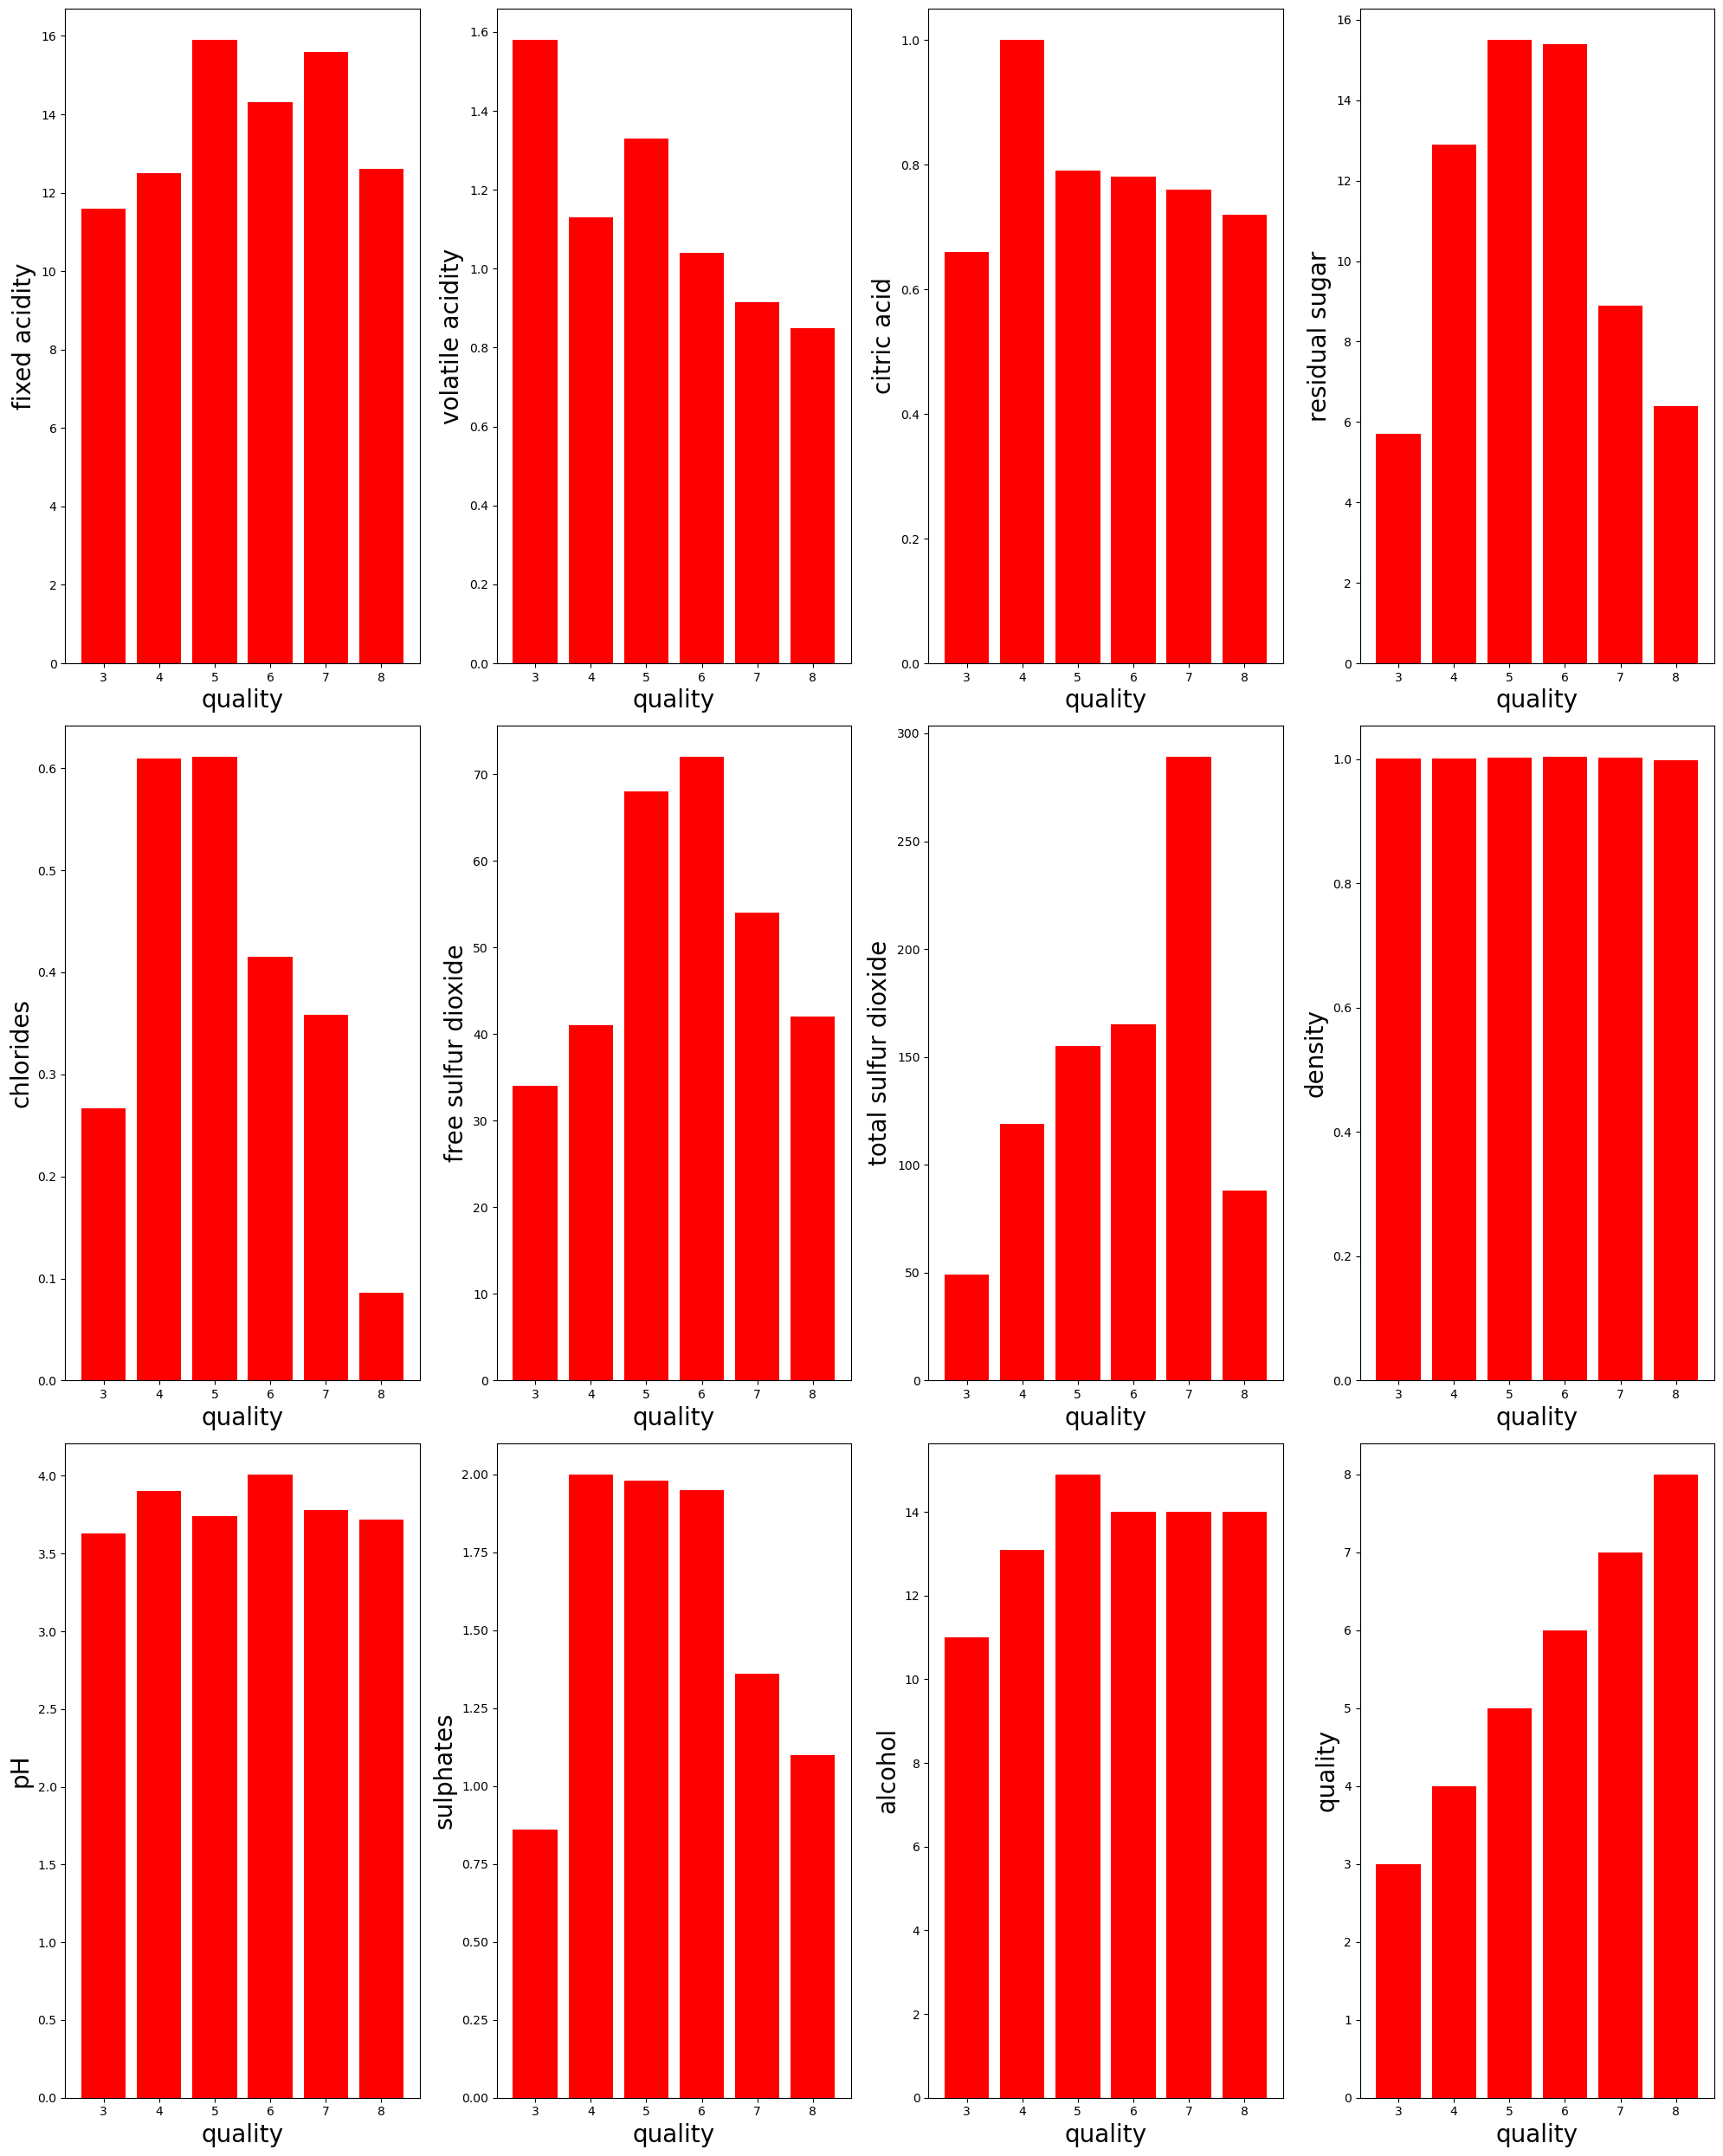

In [17]:
plt.figure(figsize=(20,25), facecolor='white')
p =1
for column in df:
    if p <=12:
        ax = plt.subplot(3,4,p)
        plt.bar(df['quality'], df[column], color='r') 
        plt.xlabel('quality',fontsize=20)
        plt.ylabel(column, fontsize =20)
    p+=1
plt.tight_layout()
plt.show()


from above we can notice

    good quality wine (7&8)=has higher amount of alcohol and fixed acidity
    good quality wine     = should have lower level of chlorides, volatile acidity
    good quality wine     = should have moderate total sulphur dioxide

 Density and residual sugar has no effect


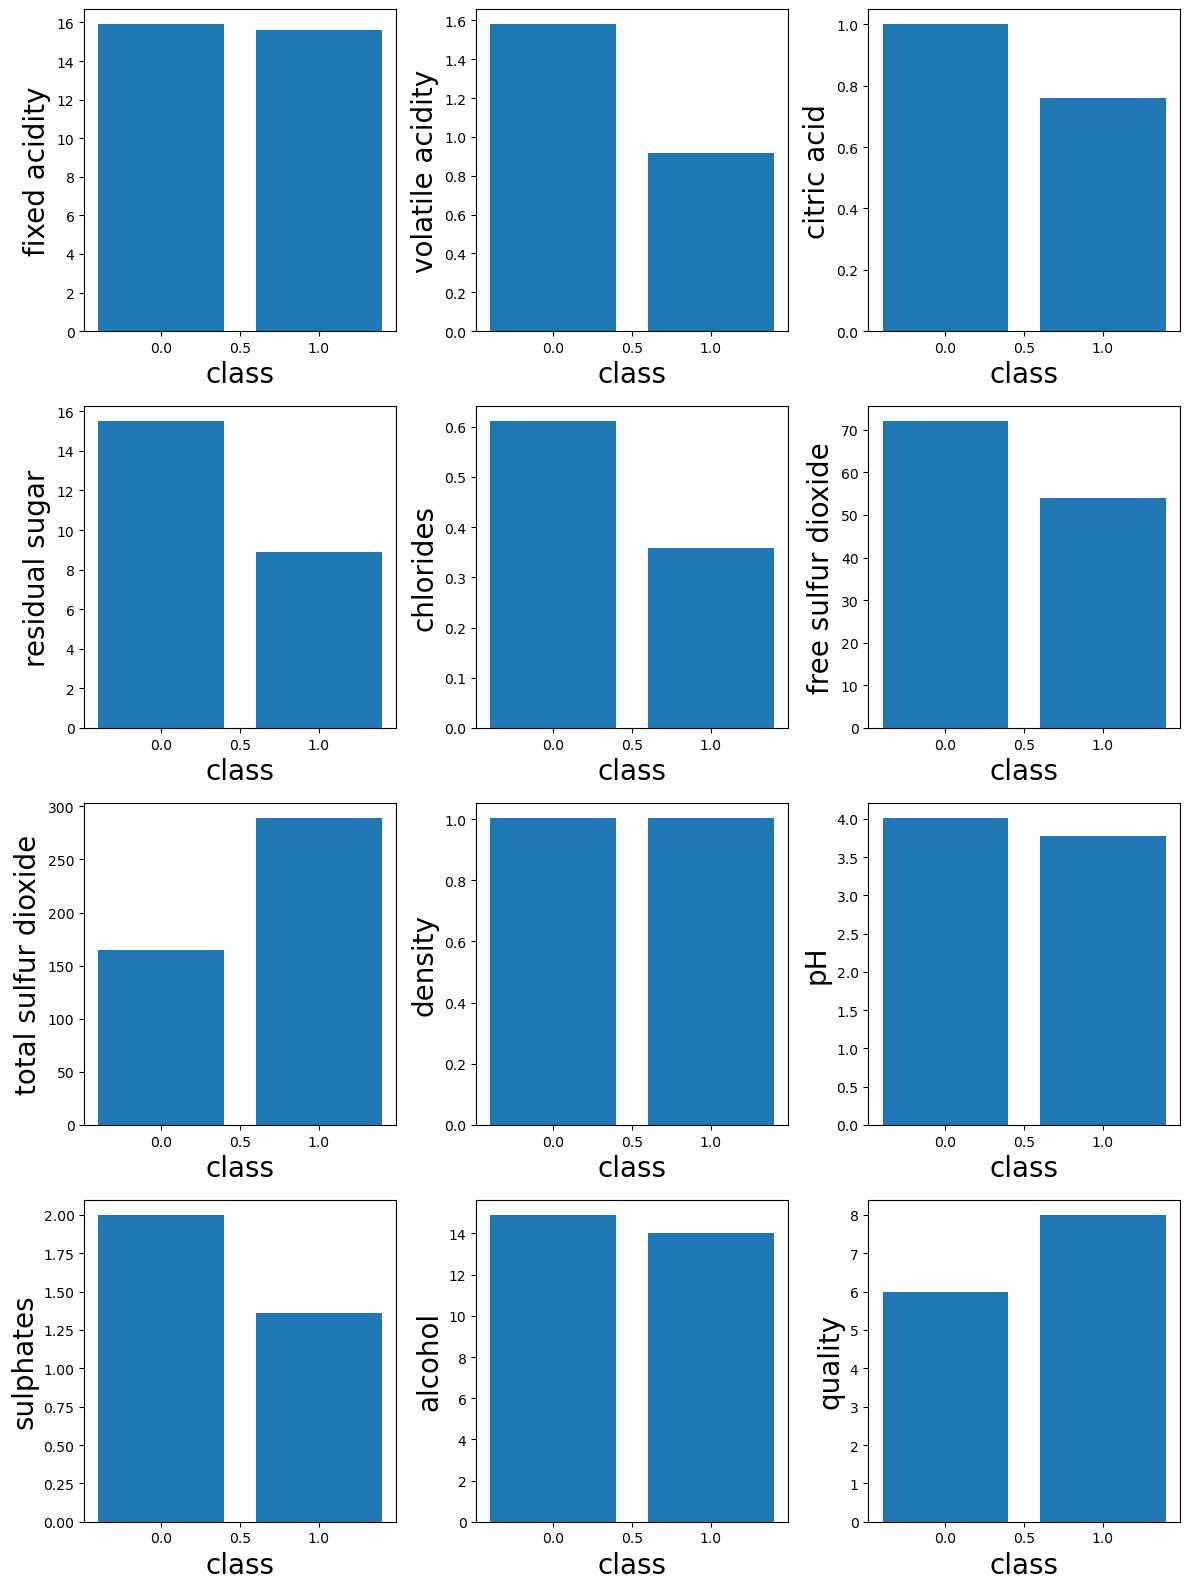

In [18]:
plt.figure(figsize=(12,16), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        plt.bar(df['class'], df[column]) 
        plt.xlabel('class',fontsize=20)
        plt.ylabel(column, fontsize =20)
    plotnumber+=1
plt.tight_layout()
plt.show()


    Quality of wine increase with increase in alcohol, residual sugar, citric acid,fixed acidity.
    Quality of wine decreses with increase in total sulfur dioxide,chlorides, volatile acidity,free sulfur dioxide.


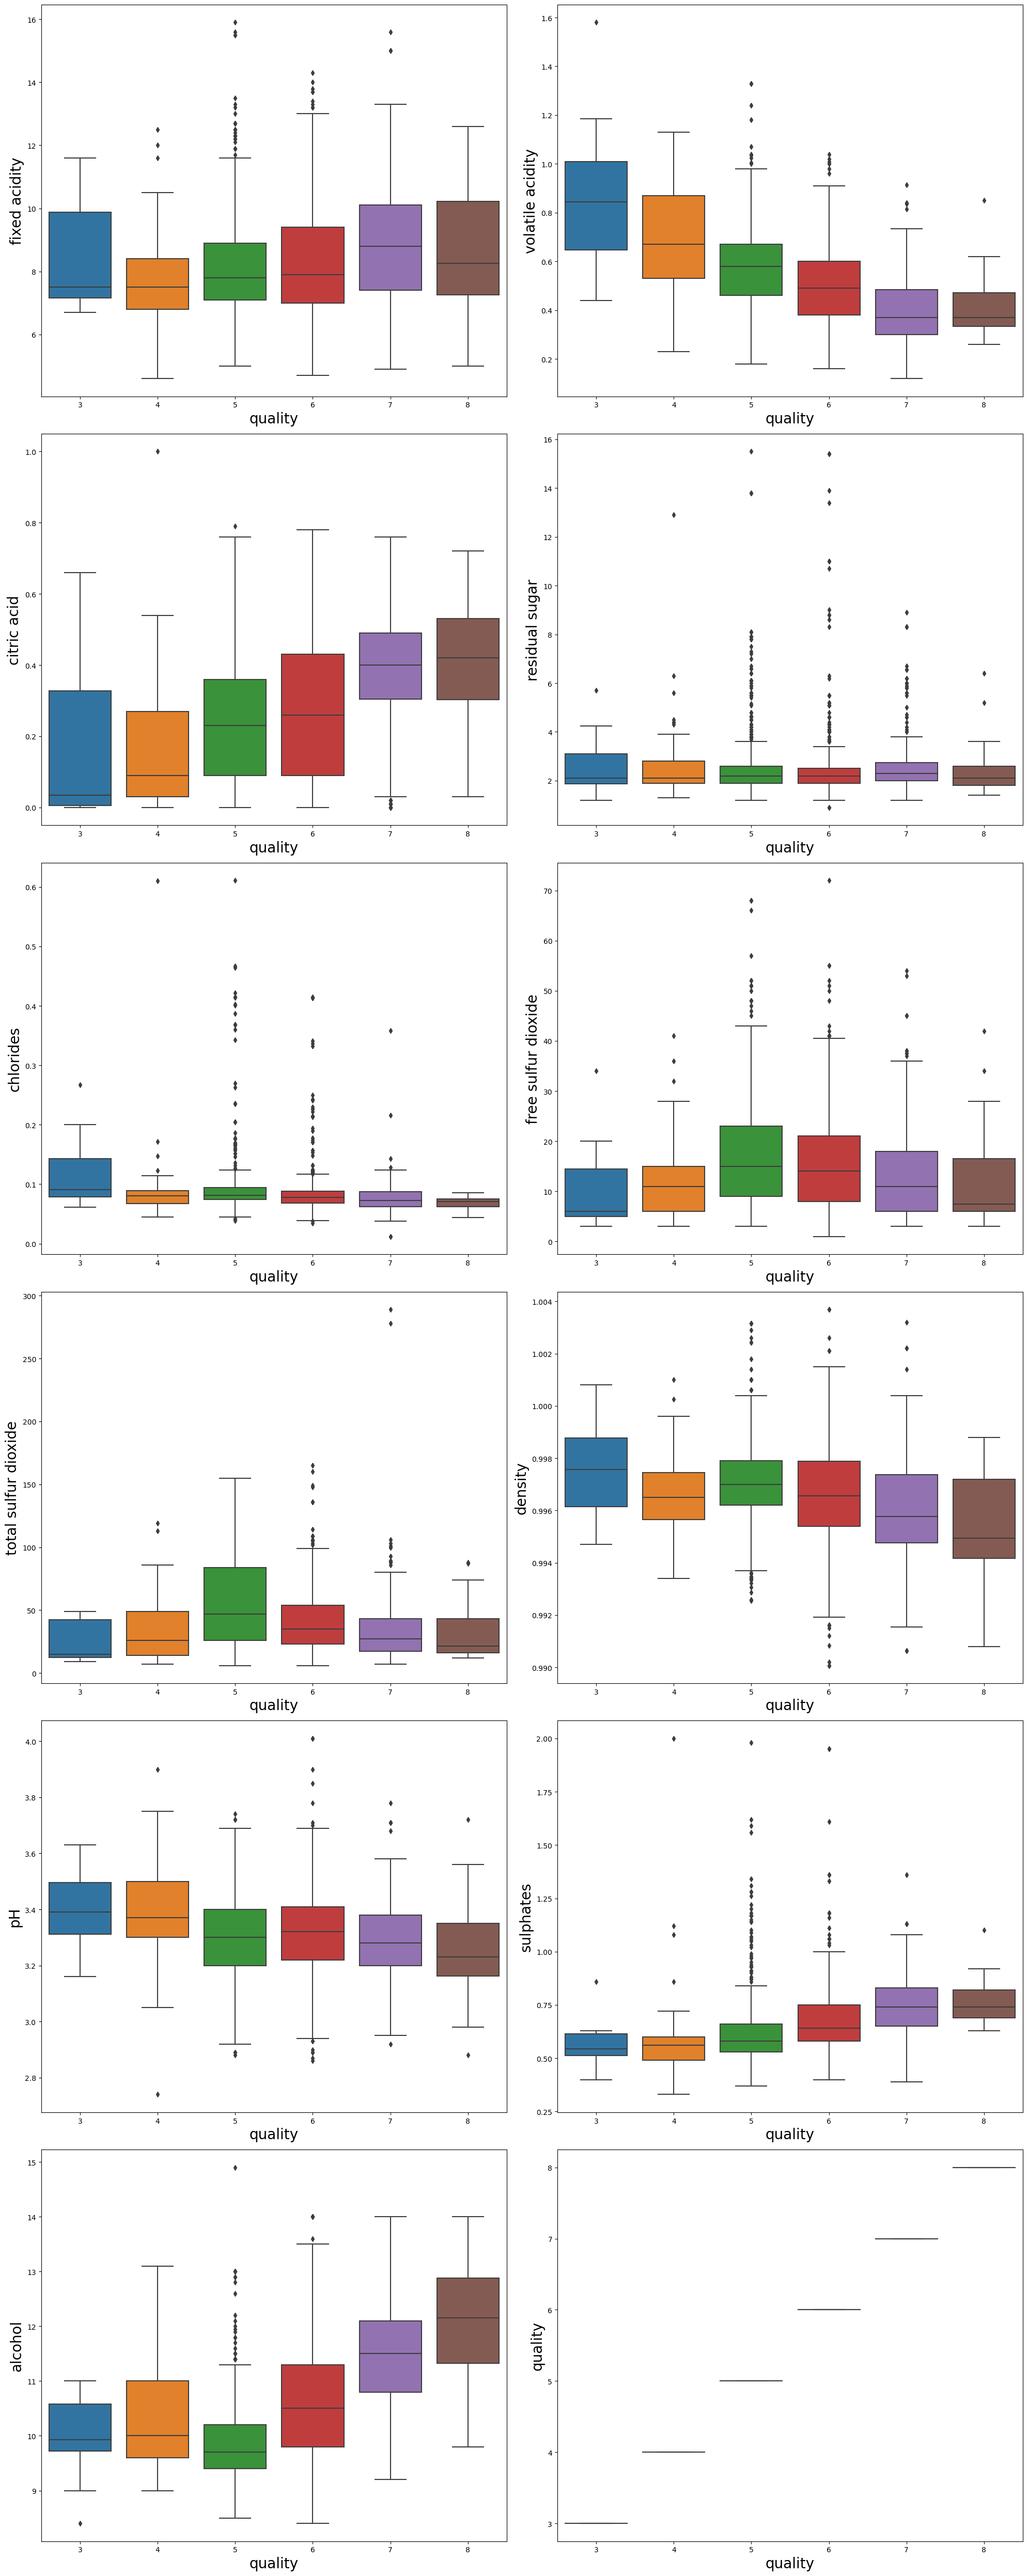

In [19]:
plt.figure(figsize=(20,50), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=12:
        ax = plt.subplot(6,2,plotnumber)
        sns.boxplot(df['quality'],df[column]) 
        plt.xlabel('quality',fontsize=20)
        plt.ylabel(column, fontsize =20)
    plotnumber+=1
plt.tight_layout()
plt.show()

from above plot we can see outkiers are present in them

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


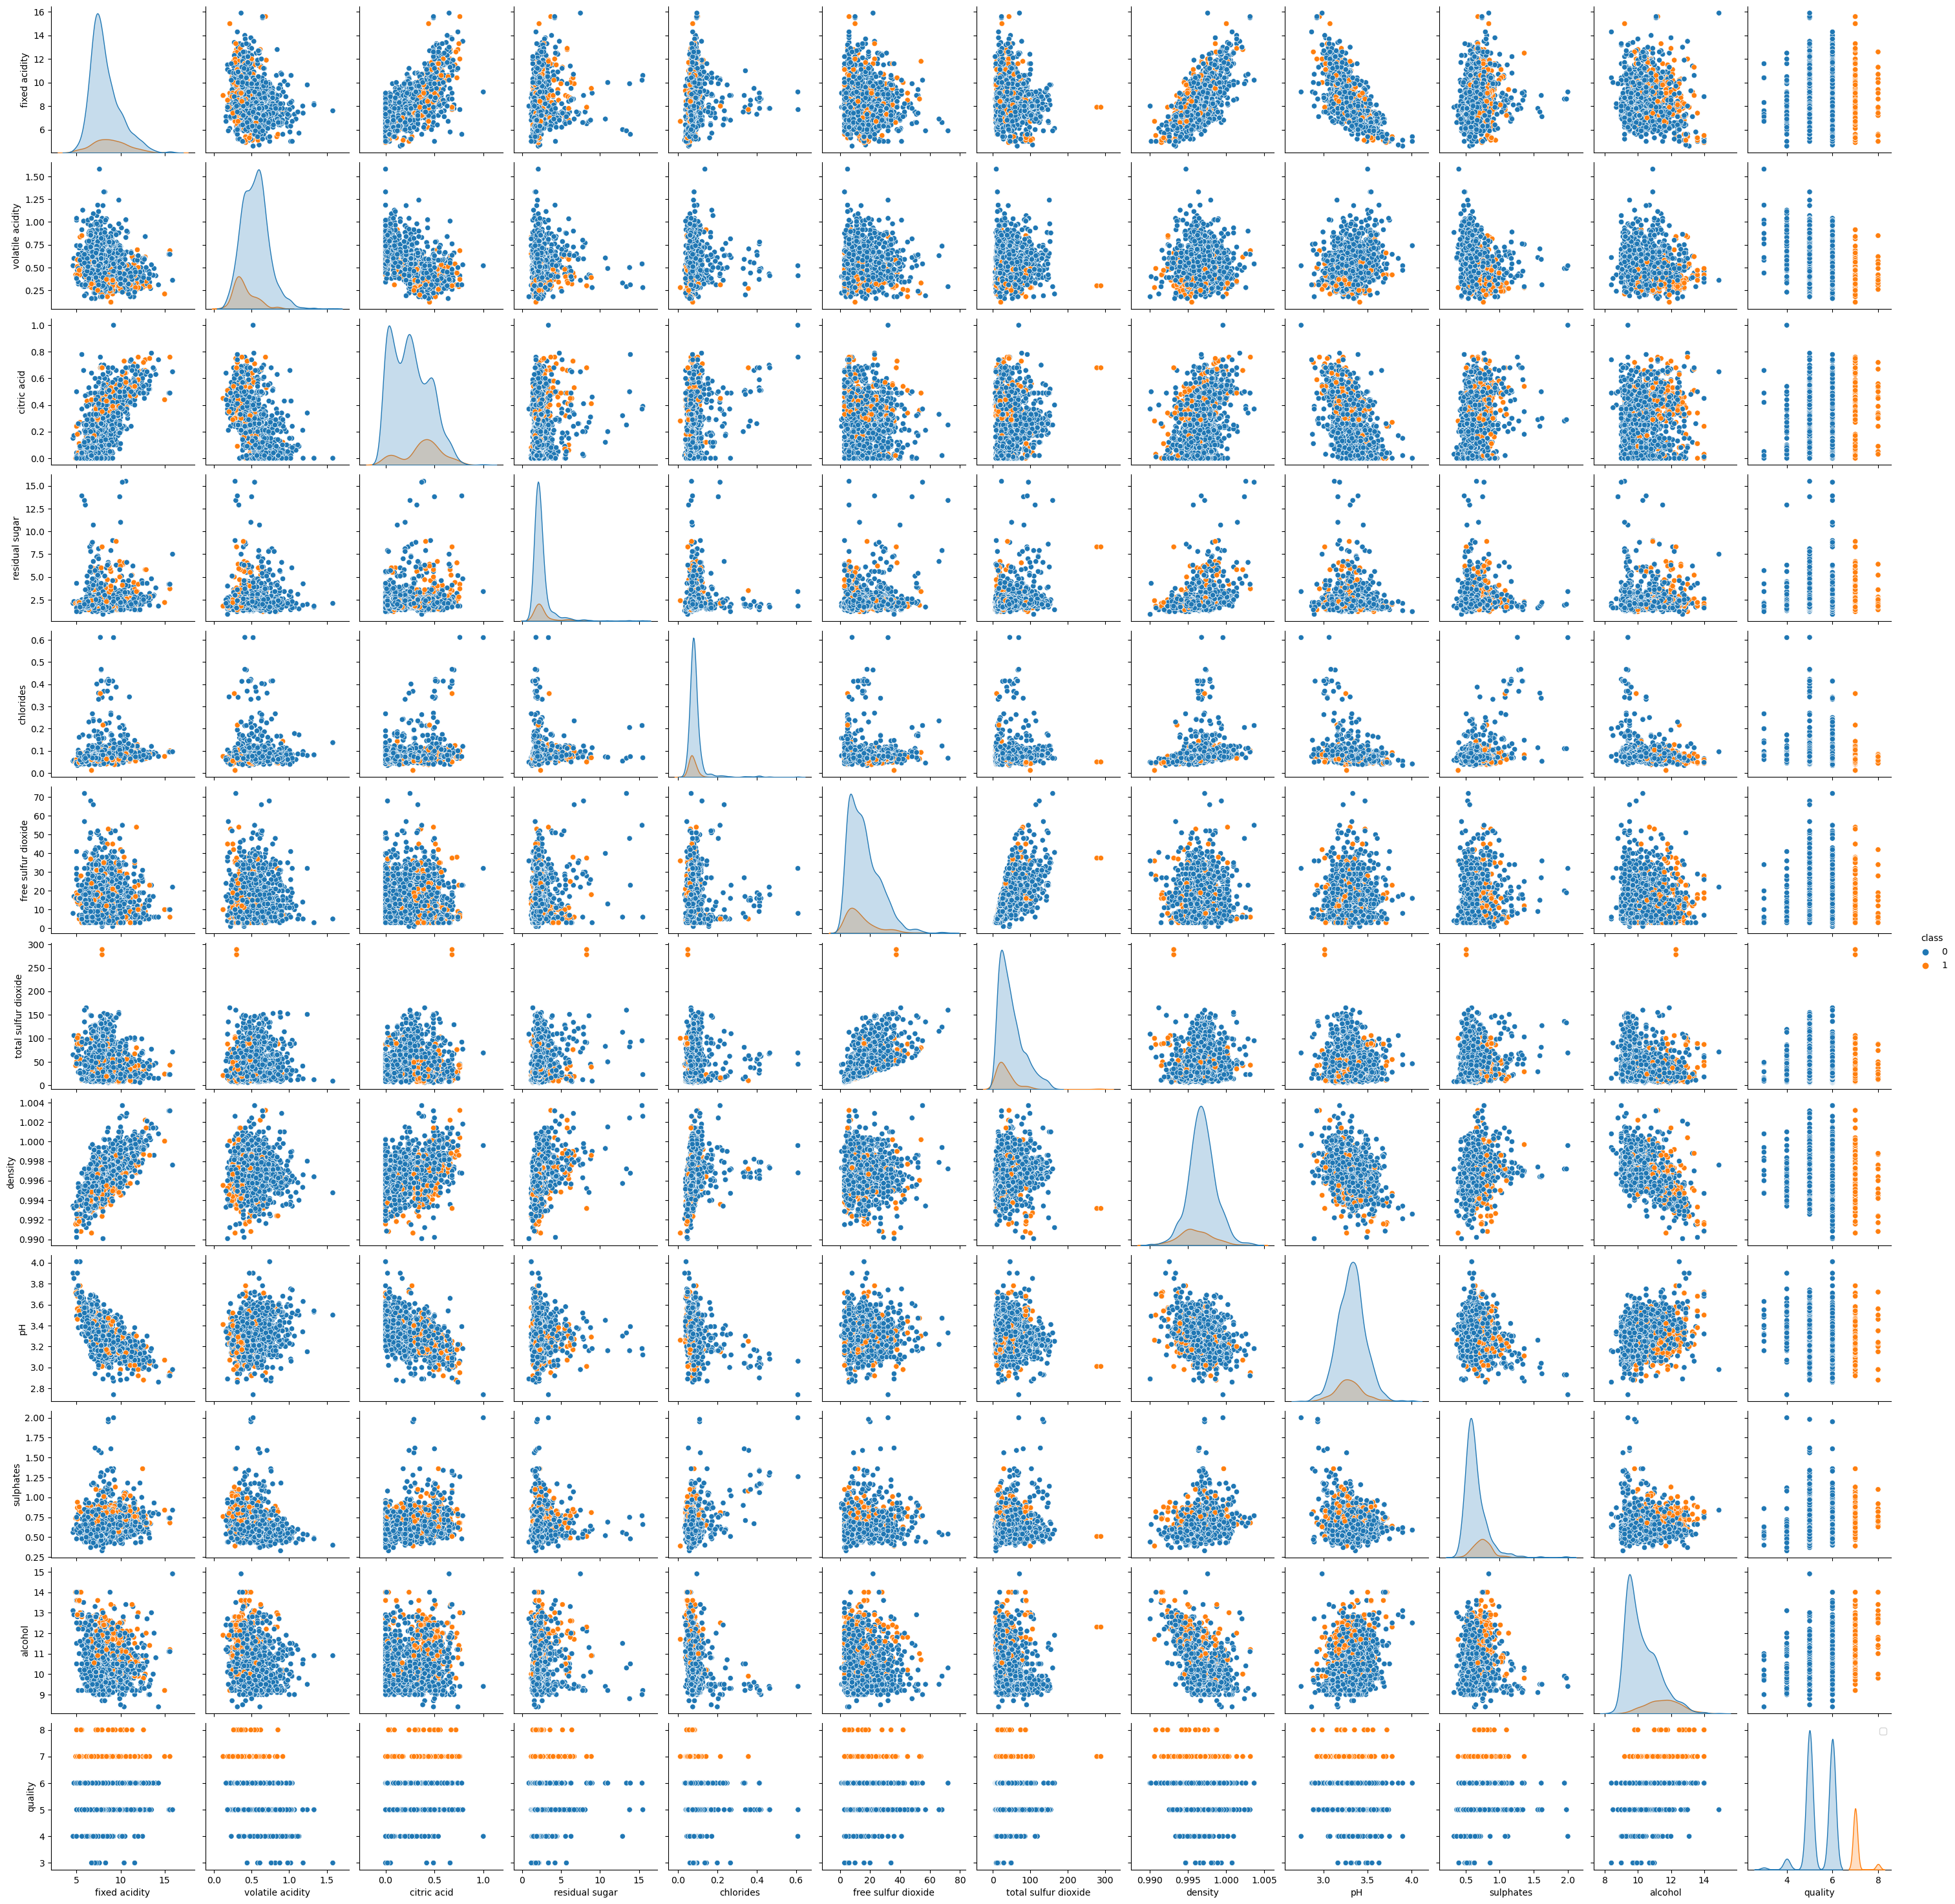

In [20]:
sns.pairplot(data=df, hue='class')
plt.legend()
plt.show()


# Feature selection


# Outliers Detection basesd on IQR

In [21]:
# 1st quantile
Q1=df1.quantile(.25)
# 3 rd quartile
Q3=df1.quantile(.75)
# IQR
IQR=Q3-Q1
print(IQR)


fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
class                    0.000000
dtype: float64


In [22]:
df_new=df1[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df_new.shape

(1047, 12)

In [23]:
print('data loss percentage after removing outliers with IQR method',((df.shape[0]-df_new.shape[0])/df.shape[0])*100)

data loss percentage after removing outliers with IQR method 34.52157598499062


Since there sis asignificant data loss which is 35%


# outliers removal using z score

In [24]:
from scipy.stats import zscore

In [25]:
df3=df1.copy()
z_score = zscore(df3)
z_score_abs = np.abs(z_score)


In [26]:
df_new= df3[(z_score_abs < 3).all(axis=1)]
df_new.shape

(1458, 12)

In [27]:
print('data loss percentage after removing outliers with z score method',((df.shape[0]-df_new.shape[0])/df.shape[0])*100)

data loss percentage after removing outliers with z score method 8.818011257035648


# Skewness detection

In [28]:
df_new.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
class                   2.103030
dtype: float64

Data is highly skewed. So it need to transform


In [29]:
df_new[['residual sugar','chlorides','total sulfur dioxide']]=np.cbrt(df_new[['residual sugar','chlorides','total sulfur dioxide']])

In [30]:
df_new.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          1.629756
chlorides               1.056128
free sulfur dioxide     0.869727
total sulfur dioxide    0.343010
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
class                   2.103030
dtype: float64

# Transforming positive or right skew data using boxcox transformation

In [31]:
from scipy.stats import boxcox

In [32]:
df_new['fixed acidity']=boxcox(df_new['fixed acidity'],0)
df_new['residual sugar']=boxcox(df_new['residual sugar'],-1)
df_new['chlorides']=boxcox(df_new['chlorides'],-0.5)
df_new['free sulfur dioxide']=boxcox(df_new['free sulfur dioxide'],0)
df_new['total sulfur dioxide']=boxcox(df_new['total sulfur dioxide'],0)
df_new['sulphates']=boxcox(df_new['sulphates'],0)
df_new['alcohol']=boxcox(df_new['alcohol'],-0.5)


In [33]:
df_new.skew()

fixed acidity           0.377100
volatile acidity        0.392097
citric acid             0.292600
residual sugar          0.843768
chlorides               0.284539
free sulfur dioxide    -0.300264
total sulfur dioxide   -0.095735
density                 0.055543
pH                      0.113039
sulphates               0.345344
alcohol                 0.508422
class                   2.103030
dtype: float64

skewness has been removed 

# Correlation

In [34]:
df_new.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.295813     0.692400   
volatile acidity          -0.295813          1.000000    -0.589286   
citric acid                0.692400         -0.589286     1.000000   
residual sugar             0.211156          0.037997     0.189757   
chlorides                  0.235590          0.080353     0.103401   
free sulfur dioxide       -0.170132          0.046278    -0.107676   
total sulfur dioxide      -0.096951          0.099221    -0.027290   
density                    0.664021         -0.000446     0.372338   
pH                        -0.721165          0.252900    -0.521270   
sulphates                  0.190975         -0.356126     0.308570   
alcohol                   -0.037563         -0.212683     0.162704   
class                      0.119643         -0.268236     0.226809   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.211156   0.235590            -0.170132   
volatile acidity            0.037997   0.080353             0.046278   
citric acid                 0.189757   0.103401            -0.107676   
residual sugar              1.000000   0.198249             0.019871   
chlorides                   0.198249   1.000000            -0.024549   
free sulfur dioxide         0.019871  -0.024549             1.000000   
total sulfur dioxide        0.108626   0.084284             0.778888   
density                     0.391832   0.401012            -0.041086   
pH                         -0.077012  -0.204093             0.132344   
sulphates                   0.066386  -0.002241             0.045477   
alcohol                     0.159688  -0.266099            -0.090153   
class                       0.088793  -0.138909            -0.095752   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.096951  0.664021 -0.721165   0.190975   
volatile acidity                  0.099221 -0.000446  0.252900  -0.356126   
citric acid                      -0.027290  0.372338 -0.521270   0.308570   
residual sugar                    0.108626  0.391832 -0.077012   0.066386   
chlorides                         0.084284  0.401012 -0.204093  -0.002241   
free sulfur dioxide               0.778888 -0.041086  0.132344   0.045477   
total sulfur dioxide              1.000000  0.140454  0.032708   0.006369   
density                           0.140454  1.000000 -0.311217   0.133096   
pH                                0.032708 -0.311217  1.000000  -0.025521   
sulphates                         0.006369  0.133096 -0.025521   1.000000   
alcohol                          -0.269103 -0.462380  0.138230   0.255667   
class                            -0.183569 -0.154221 -0.079528   0.312522   

                       alcohol     class  
fixed acidity        -0.037563  0.119643  
volatile acidity     -0.212683 -0.268236  
citric acid           0.162704  0.226809  
residual sugar        0.159688  0.088793  
chlorides            -0.266099 -0.138909  
free sulfur dioxide  -0.090153 -0.095752  
total sulfur dioxide -0.269103 -0.183569  
density              -0.462380 -0.154221  
pH                    0.138230 -0.079528  
sulphates             0.255667  0.312522  
alcohol               1.000000  0.424230  
class                 0.424230  1.000000

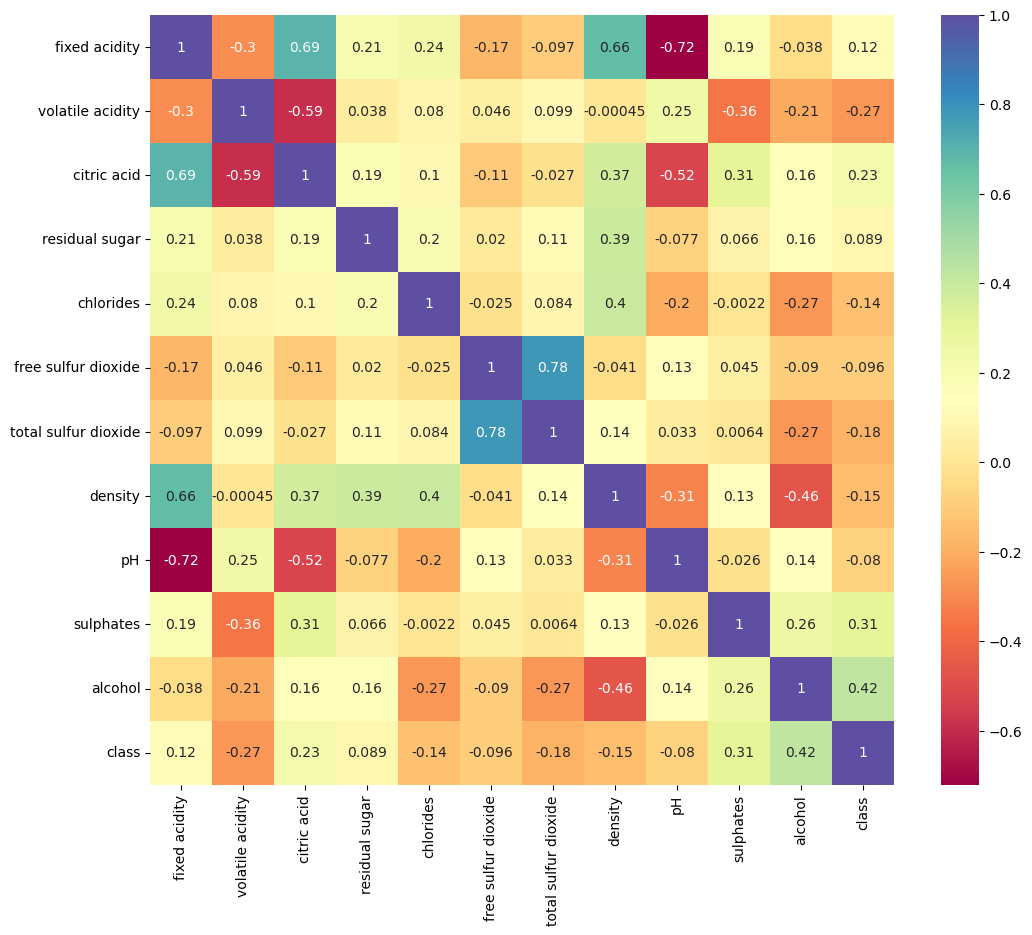

In [35]:
plt.figure(figsize =(12,10))
sns.heatmap(df_new.corr(), annot= True ,cmap='Spectral')
# cmap =PiYG cmap='Spectral'
plt.show()

# Visualizing correlation of feature columns with label column.

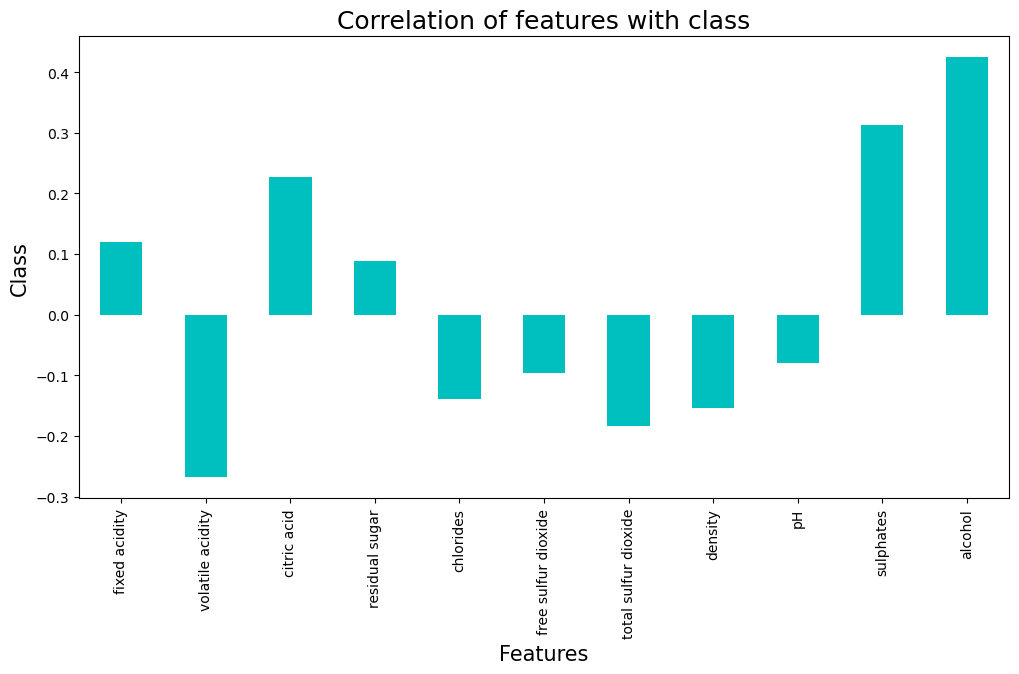

In [36]:
plt.figure(figsize = (12,6))
df_new.corr()['class'].drop(['class']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Class',fontsize=15)
plt.title('Correlation of features with class',fontsize = 18)
plt.show()

from the above there is a + ve correlation b/w alcohol,sulphates and citric acid with class

# Checking Multicollinearity between features using variance_inflation_factor

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
df_new1=df_new.copy()
vif=pd.DataFrame()
vif['vif'] = [variance_inflation_factor(df_new.values,i) for i in range(len(df_new.columns))]
vif['Features']= df_new1.columns
vif


vif              Features
0  218.595391         fixed acidity
1   19.067284      volatile acidity
2    8.292233           citric acid
3   14.383337        residual sugar
4   99.536450             chlorides
5   41.602707   free sulfur dioxide
6   76.117108  total sulfur dioxide
7    8.245267             sulphates
8  377.788895               alcohol
9    1.453641                 class

In [ ]:
# since ph and density has very high vif we will drop these column
df_new1=df_new1.drop(['density','pH'],axis=1)

## 

In [46]:
vif=pd.DataFrame()
vif['vif'] = [variance_inflation_factor(df_new.values,i) for i in range(len(df_new.columns))]
vif['Features']= df_new1.columns
vif


vif              Features
0  218.595391         fixed acidity
1   19.067284      volatile acidity
2    8.292233           citric acid
3   14.383337        residual sugar
4   99.536450             chlorides
5   41.602707   free sulfur dioxide
6   76.117108  total sulfur dioxide
7    8.245267             sulphates
8  377.788895               alcohol
9    1.453641                 class

still there is lot of multicollinearity so we need to scale it which can be reduced by PCA(demensionality reduction technique)

# Standard Scaling

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
x=df_new.drop(['class'],axis=1)
y=df_new['class']

In [50]:
sc=StandardScaler()
x_scale=sc.fit_transform(x)

In [51]:
x_scale

array([[-0.51360254,  1.0387081 , -1.38741253, ..., -0.04063113,
        -0.60954326, -1.04551382],
       [-0.23702113,  2.10132549, -1.38741253, ...,  0.95321505,
         0.39246697, -0.58517226],
       [-0.23702113,  1.39291389, -1.17821377, ...,  0.63717348,
         0.15960713, -0.58517226],
       ...,
       [-1.35910388, -0.0829436 , -0.70751654, ...,  0.19748059,
         0.89812923,  0.64182987],
       [-1.70374108,  0.71401945, -0.75981623, ...,  0.3371226 ,
         0.6152721 , -0.15218234],
       [-1.61543928, -1.26362959,  1.07067297, ...,  0.26896462,
         0.23840028,  0.64182987]])

# PCA(principal component analysis)

In [52]:
from sklearn.decomposition import PCA

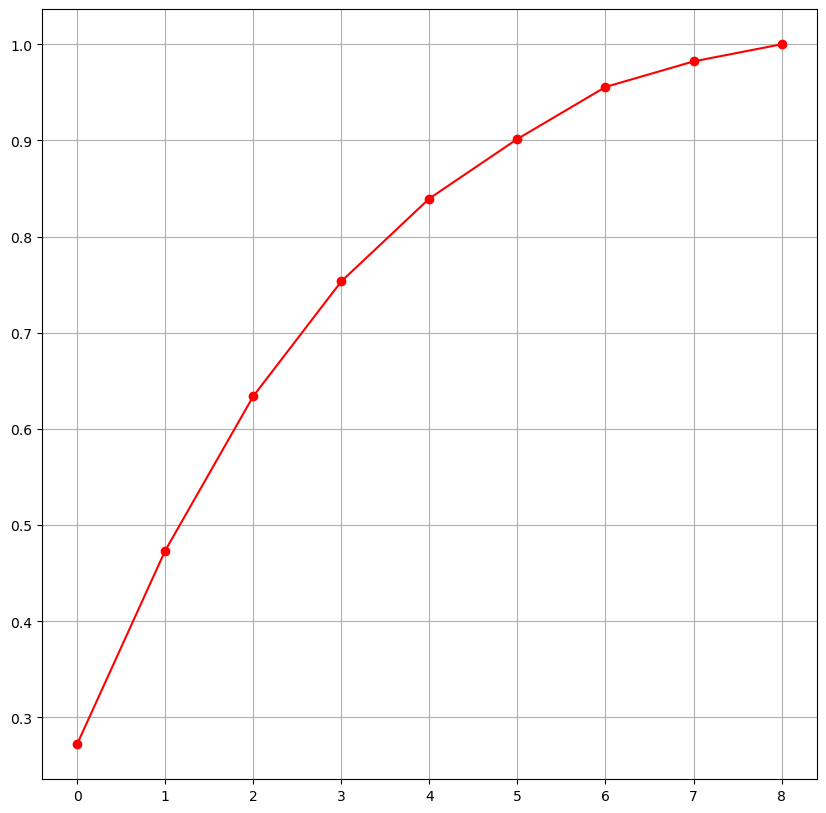

In [53]:
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(x_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()


As per the graph we can see 8 principal component give almost 90% variation in data,so we will pick 8 component

In [54]:
pca=PCA(n_components=8)
new_pcomp=pca.fit_transform(x_scale)
princi_comp=pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
princi_comp

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     1.956402  0.628374 -0.602678 -0.476094  0.147914 -0.500950  0.117239   
1     2.134507 -1.250102 -0.742073  1.052205  1.056713 -0.858679 -0.601701   
2     1.615280 -0.510756 -0.690255  0.443195  0.813556 -0.566353 -0.289473   
3    -1.571496 -1.393075 -0.093426 -1.687799 -1.279566  0.143966 -0.204053   
4     1.956402  0.628374 -0.602678 -0.476094  0.147914 -0.500950  0.117239   
...        ...       ...       ...       ...       ...       ...       ...   
1453  1.938573 -0.491515  0.571159  0.181381  0.562647  0.991674 -0.297659   
1454  1.415218 -0.533127  2.515315  0.635612  0.616654 -0.036558  0.123035   
1455  0.870884 -0.450023  1.604382  0.618625  0.951187  0.352963  0.183203   
1456  1.840942 -0.489977  1.234373  0.095346  0.935808 -0.035403  0.062239   
1457 -0.639122 -0.601023  1.551111  1.138073 -0.529584  0.908324  1.564558   

           PC8  
0    -0.230421  
1    -0.259371  
2    -0.092724  
3    -0.129714  
4    -0.230421  
...        ...  
1453 -0.240314  
1454 -0.173318  
1455 -0.265640  
1456  0.090222  
1457  0.761625  

[1458 rows x 8 columns]

# Model Building

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score


# Find best random state

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    x_train,x_test,y_train,y_test = train_test_split(new_pcomp,y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(x_train,y_train)
    y_pred=log_reg.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)



Best accuracy is 0.9155251141552512 on Random_state 133


In [61]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 12),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('Classification ML Algorithm Evaluation Matrix',m,'is' )
    print('\n')
    print('Accuracy Score :', accuracy_score(Y_test, y_pred))
    print('\n')
    print('Confusion matrix :',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('Classification Report :',classification_report(Y_test, y_pred))
    print('\n')
    print('======================================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score : 0.9041095890410958


Confusion matrix : [[378   5]
 [ 37  18]]


Classification Report :               precision    recall  f1-score   support

           0       0.91      0.99      0.95       383
           1       0.78      0.33      0.46        55

    accuracy                           0.90       438
   macro avg       0.85      0.66      0.70       438
weighted avg       0.89      0.90      0.89       438



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score : 0.8995433789954338


Confusion matrix : [[377   6]
 [ 38  17]]


Classification Report :               precision    recall  f1-score   support

           0       0.91      0.98      0.94       383
           1       0.74      0.31      0.44        55

    accuracy                           0.90       438
   macro avg       0.82      0.65      0.69       438
weighted avg       0.89      0.90      0.88       438



C

# Cross Validation Score

We can see that RandomForestClassifier() gives maximum Accuracy so we will continue further investigation with crossvalidation of above model

In [64]:
from sklearn.model_selection import cross_val_score
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
    
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for m in model:
    score = cross_val_score(m, x, y, cv =5)
    print('\n')
    print('Cross Validation Score', m, ':')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('=======================================================')



Cross Validation Score LogisticRegression() :
Score : [0.85958904 0.86643836 0.85958904 0.8556701  0.86597938]
Mean Score : 0.8614531845784494
Std deviation : 0.004140832938372819




Cross Validation Score SVC() :
Score : [0.8630137  0.8630137  0.85958904 0.86254296 0.86254296]
Mean Score : 0.8621404698018171
Std deviation : 0.0012929682756927664




Cross Validation Score GaussianNB() :
Score : [0.89726027 0.76712329 0.89726027 0.79037801 0.88316151]
Mean Score : 0.8470366709033563
Std deviation : 0.05647331721456465




Cross Validation Score DecisionTreeClassifier() :
Score : [0.89383562 0.81164384 0.84931507 0.76632302 0.78350515]
Mean Score : 0.8209245398484206
Std deviation : 0.04602111383626246




Cross Validation Score RandomForestClassifier() :
Score : [0.89041096 0.84931507 0.88013699 0.86597938 0.87628866]
Mean Score : 0.8724262109871486
Std deviation : 0.013953581926605663




Cross Validation Score AdaBoostClassifier() :
Score : [0.90068493 0.84589041 0.88013699 0.8316

we can see that Random Forest Classifier gives maximum Accuracy. So we will apply Hyperparameter tuning on Random Forest model

# Hyperparameter Tuning

In [65]:
from sklearn.model_selection import GridSearchCV


In [66]:
parameter = {'n_estimators':[30,50,60],'max_depth': [10,20,40,60,80],
             'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}

In [67]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1)
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [30, 50, 60]})

In [68]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 60}

# Final Model

In [69]:
Final_mod = RandomForestClassifier(criterion='entropy',n_estimators= 60, max_depth=20 ,max_features='sqrt')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('Accuracy Score :', accuracy_score(Y_test, y_pred))

Accuracy Score : 0.91324200913242


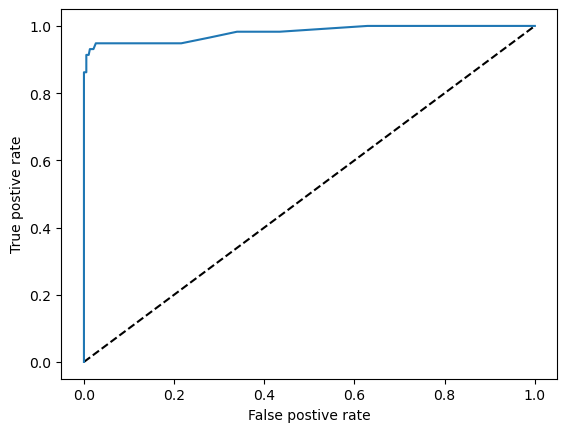

Auc Score : 0.5256824115831948


In [70]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = Final_mod.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(x_test))
print('Auc Score :',auc_score)

# Saving the Model

In [71]:
import joblib
joblib.dump(Final_mod,'Red_Wine_prediction.pkl')

['Red_Wine_prediction.pkl']

In [73]:
#lets load the saved model and get the prediction
model=joblib.load('Red_Wine_prediction.pkl')

In [74]:
prediction=model.predict(x_test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [75]:
a=np.array(y_test)
a

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [76]:
df=pd.DataFrame({'predicted':prediction,'original':a})
df

predicted  original
0            0         0
1            0         0
2            0         0
3            0         0
4            0         0
..         ...       ...
433          1         1
434          0         0
435          0         0
436          0         0
437          0         0

[438 rows x 2 columns]